In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('train.csv')
print(df.shape)
df.head()

(20800, 5)


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df1 = df.dropna()
df1.reset_index(drop=True)
df1.shape

(18285, 5)

In [6]:
x = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

label
0    10361
1     7924
Name: count, dtype: int64
0: Reliable
1: Unreliable


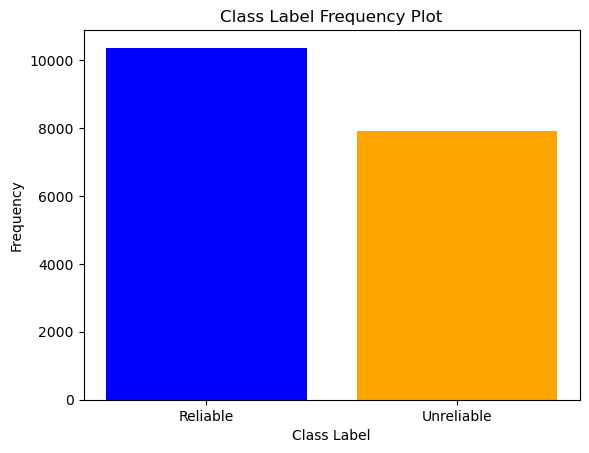

In [7]:
class_label_counts = y.value_counts()
print(class_label_counts)
print("0: Reliable\n1: Unreliable")
plt.bar(['Reliable', 'Unreliable'], class_label_counts.values, color=['blue', 'orange'])

plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Class Label Frequency Plot')
plt.show()


In [8]:
x.shape

(18285, 4)

# Stemming and removing Stop words

In [9]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
corpus = []
for i in range(len(x)):
    review = re.sub('[^A-Za-z]',' ',x.iloc[i,1]) # title
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)


    

In [10]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet'

# Bag of Words

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# Bag of Words
cv = CountVectorizer(ngram_range=(1,3), max_features=5000)
X = cv.fit_transform(corpus).toarray()


In [10]:
cv.get_feature_names_out()[:10]

array(['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl',
       'abort', 'abroad', 'absolut'], dtype=object)

Naive Bayes

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

mnb = MultinomialNB()
mnb.fit(X_train,y_train)


MultinomialNB()

              precision    recall  f1-score   support

    Reliable       0.92      0.89      0.90      2600
  Unreliable       0.86      0.90      0.88      1972

    accuracy                           0.89      4572
   macro avg       0.89      0.89      0.89      4572
weighted avg       0.89      0.89      0.89      4572

Accuracy: 0.8904199475065617


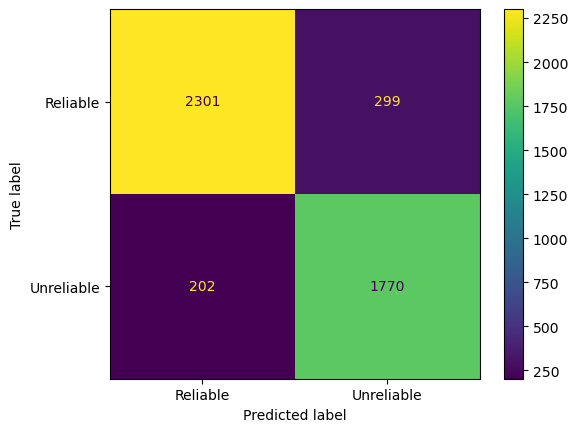

In [27]:
y_pred = mnb.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Reliable', 'Unreliable']))
print('Accuracy:', accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions( y_test, y_pred, display_labels=['Reliable', 'Unreliable'])
plt.show()




In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

parameters = {  
'alpha': ( 1.2, 1.15 , 1.1, 1.05, 1, 0.1, 0.01, 0.001)  
}
grid = GridSearchCV(mnb, parameters, cv=StratifiedKFold(5).split(X_train, y_train)) # 5 fold Stratified Cross Validation
grid.fit(X_train,y_train)

print('Training Score: ',grid.best_score_)
print("Best Parameters: ", grid.best_params_)


Training Score:  0.9040320922988642
Best Parameters:  {'alpha': 1.1}


              precision    recall  f1-score   support

    Reliable       0.92      0.88      0.90      2600
  Unreliable       0.85      0.90      0.88      1972

    accuracy                           0.89      4572
   macro avg       0.89      0.89      0.89      4572
weighted avg       0.89      0.89      0.89      4572

Accuracy: 0.889763779527559


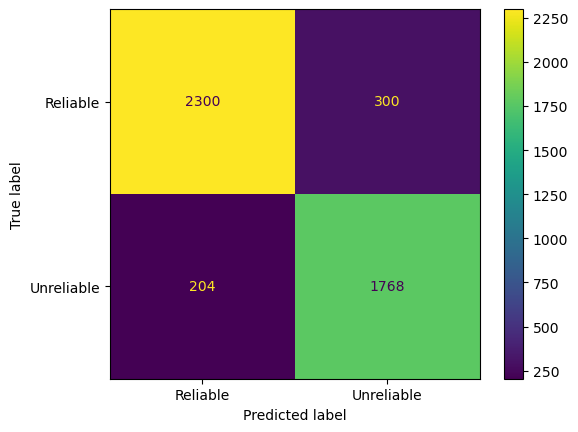

In [32]:
y_pred = grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Reliable', 'Unreliable']))
print('Accuracy:', accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions( y_test, y_pred, display_labels=['Reliable', 'Unreliable'])
plt.show()



Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression()
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=StratifiedKFold(5).split(X_train, y_train), scoring='accuracy')

grid_search.fit(X_train, y_train)
print('Training Score: ',grid_search.best_score_)

print("Best Parameters: ", grid_search.best_params_)




/home/anshuman/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anshuman/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anshuman/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anshuman/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anshuman/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anshuman/anaconda3/lib/python3.11/site-packages/s

Training Score:  0.9347325584147221
Best Parameters:  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


              precision    recall  f1-score   support

    Reliable       0.97      0.89      0.93      2600
  Unreliable       0.87      0.97      0.92      1972

    accuracy                           0.93      4572
   macro avg       0.92      0.93      0.92      4572
weighted avg       0.93      0.93      0.93      4572

Accuracy: 0.9251968503937008


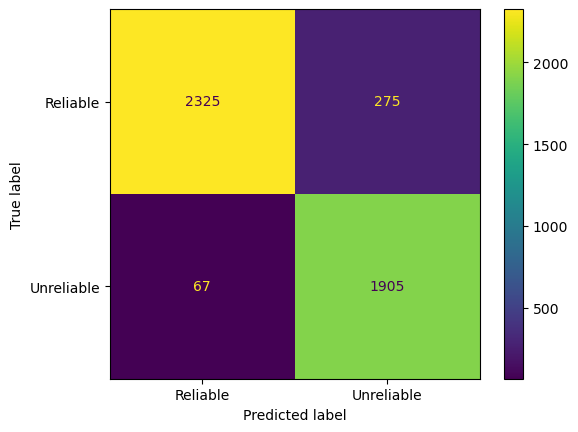

In [36]:
y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Reliable', 'Unreliable']))
print('Accuracy:', accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions( y_test, y_pred, display_labels=['Reliable', 'Unreliable'])
plt.show()


# Implemeneting TF-IDF

In [26]:
tfidf = TfidfVectorizer(ngram_range=(1,3), max_features=5000)
X1 = tfidf.fit_transform(corpus).toarray()


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.25, random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression()

Logistic Regression on TFIDF vectors

              precision    recall  f1-score   support

    Reliable       0.98      0.87      0.92      2600
  Unreliable       0.85      0.98      0.91      1972

    accuracy                           0.92      4572
   macro avg       0.92      0.92      0.92      4572
weighted avg       0.92      0.92      0.92      4572

Accuracy: 0.915573053368329


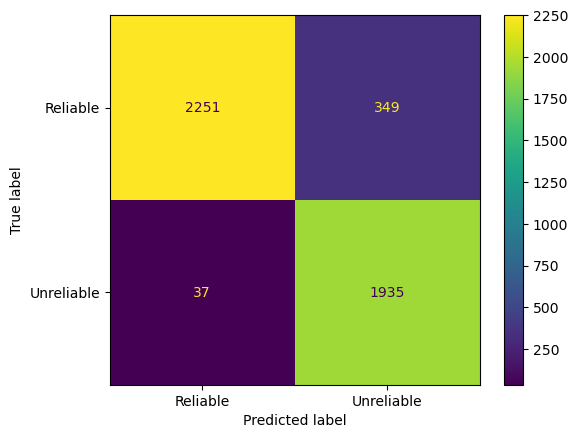

In [29]:

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Reliable', 'Unreliable']))
print('Accuracy:', accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions( y_test, y_pred, display_labels=['Reliable', 'Unreliable'])
plt.show()

Naive Bayes on Tfidf

              precision    recall  f1-score   support

    Reliable       0.86      0.94      0.90      2600
  Unreliable       0.91      0.80      0.85      1972

    accuracy                           0.88      4572
   macro avg       0.89      0.87      0.88      4572
weighted avg       0.88      0.88      0.88      4572

Accuracy: 0.8803587051618548


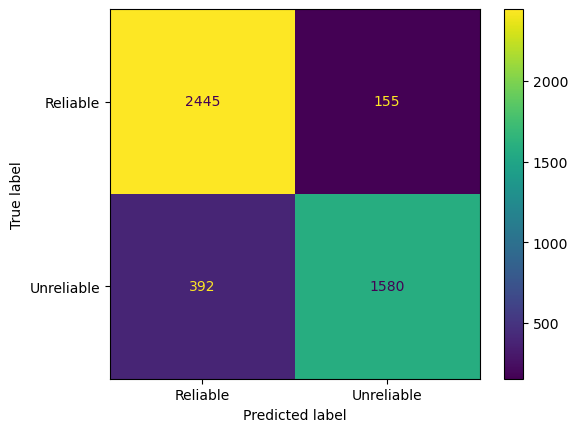

In [30]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Reliable', 'Unreliable']))
print('Accuracy:', accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions( y_test, y_pred, display_labels=['Reliable', 'Unreliable'])
plt.show()